(Placeholder for your group #)

(Placeholder for your names)

(Placeholder for your i-numbers)

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 1
# FIETS: Fundamentele Innovatie En Technologie in Scholing
## Met FIETS blijft het onderwijs vooruitgaan, zelfs tegen de wind in!

---

By completing and delivering the clinic tasks you will know how to :

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up **noisy** real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Use EDA to learn more about your data
- Create and interpret informative visualizations to explore the data set
- Derive meaningful insights for the societal impact of datasets

---
**Important Dates.**

- Clinic 1 release: Thu 30 Jan 2024
- Clinic 1 due: Fri 07 Feb 2024 late night, wildcards available

**Instructions for the deliverable:**

* You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.

---

## Context

AI is booming! Newspapers, influencers and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future esp. in critical sectors like education looks like...

Freshly graduated from a top Dutch university in Limburg, you are hired by the Dutch government to advise on a large-scale “education innovation” initiative code-named "FIETS" (Flexibele Innovatie voor Efficiënte Toepassing in Scholing). With higher education facing severe budget cuts, the government is looking for creative solutions to "do more with less." Convinced by the stunning progress in language modeling, officials believe LLMs could help battle growing teacher shortages and reduce costs by automating parts of the education process. Your job description: investigate which LMs might be best suited to plug the gaps without draining the budget!

You are handed the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset  to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, the intern responsible for collecting the results, didn’t pay attention during DACS KEN3450: Data Analysis. As a result, the collected datasets are slightly corrupted. Jammer!

The success of FIETS depends on your ability to make sense of the messy data and recommend the best model to keep the Dutch education system pedaling forward—despite uphill challenges like funding shortages and a skeptical academic community!

### A very brief primer on Language Models
We studied LLMs in the context of the NLP course but here is a short reminder. Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project the objectives of FIETS:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 FIETS
│
├── 📄 clinic1.ipynb (the file you're currently reading!)
│
└── 📁 data
    ├── 📁 task_1
    ├── 📁 task_2
    └── 📁 task_2.5
```   
 

In [2]:
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [4]:
df_test = pd.read_csv('data/task_1/mmlu_data/test.csv')

f = 'data/task_1/lm_scores/'
df_x = pd.read_csv(os.path.join(f, 'lm_X.csv'))
df_y = pd.read_csv(os.path.join(f, 'lm_Y.csv'))
df_z = pd.read_csv(os.path.join(f, 'lm_Z.csv'))

print('df_test: ', df_test.shape)
print('df_x: ', df_x.shape)
print('df_y: ', df_y.shape)
print('df_z: ', df_z.shape)


df_test:  (14042, 8)
df_x:  (13882, 2)
df_y:  (13978, 2)
df_z:  (13923, 2)


In [44]:
print('df_test: ', df_test.columns)

df_test:  Index(['question', 'A', 'B', 'C', 'D', 'answer', 'subject', 'question_id'], dtype='object')


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [25]:
# A
print("--------")
print("Model X answer formats:")
print(df_x['result'].value_counts()[::10])
print("--------")
print("Model Y answer formats:")
print(df_y['result'].value_counts()[::10])
print("--------")
print("Model Z answer formats:")
print(df_z['result'].value_counts()[::10])

--------
Model X answer formats:
A                                                                                         2733
D                                                                                          596
tribute in the form of gold, jade, feathers, cloth, and jewels., so the answer is A          1
purely physical and natural, so the answer is B                                              1
up to 250, so the answer is A                                                                1
household account book, so the answer is C                                                   1
the student should be listed as the first author., so the answer is A                        1
the right to remove oil is an incident of a defeasible fee simple., so the answer is A       1
quantity demanded barely changes with a change in price, so the answer is B                  1
Inductance., so the answer is B                                                              1
5, so the answer 

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [26]:
#A
# Create filtered copies of the dataframes
df_x_short = df_x[df_x['result'].str.len() < 10].copy()
df_y_short = df_y[df_y['result'].str.len() < 10].copy()
df_z_short = df_z[df_z['result'].str.len() < 10].copy()

# Print the shapes to see how many short answers we have
print("Original vs filtered shapes:")
print(f"Model X: {df_x.shape[0]} -> {df_x_short.shape[0]}")
print(f"Model Y: {df_y.shape[0]} -> {df_y_short.shape[0]}")
print(f"Model Z: {df_z.shape[0]} -> {df_z_short.shape[0]}")

# Let's see the unique values in each filtered dataframe
print("\nUnique short answers in Model X:")
print(df_x_short['result'].unique())
print("\nUnique short answers in Model Y:")
print(df_y_short['result'].unique())
print("\nUnique short answers in Model Z:")
print(df_z_short['result'].unique())

Original vs filtered shapes:
Model X: 13882 -> 13509
Model Y: 13978 -> 13637
Model Z: 13923 -> 12878

Unique short answers in Model X:
['B' 'C' 'D ' 'B ' 'Answer: B' 'A' 'Answer: D' 'Answer: C' 'Answer: A'
 'Not Sure' 'A ' 'C ' 'D']

Unique short answers in Model Y:
['Answer: D' 'D' 'C' 'Answer: C' 'B' 'C ' 'Answer: A' 'A ' 'D ' 'A'
 'Answer: B' 'B ' 'Not Sure']

Unique short answers in Model Z:
['B' 'Answer: B' 'C' 'B ' 'Answer: A' 'A' 'D' 'C ' 'A ' 'D ' 'Answer: C'
 'Not Sure' 'Answer: D']


In [31]:
#B
def clean_answer(s):
    if not isinstance(s, str):
        return None
        
    # Convert to uppercase and strip whitespace
    s = s.upper().strip()
    
    # Common cleaning patterns
    s = s.replace('.', '')  # Remove periods
    s = s.replace('(', '').replace(')', '')  # Remove parentheses
    s = s.replace(' ', '')  # Remove spaces
    s = s.replace('ANSWER:', '')  # Remove 'Answer'

    
    # Validate the cleaned answer
    if s in {'A', 'B', 'C', 'D'}:
        return s
    return None

# Apply cleaning to each filtered dataframe
df_x_short['clean_result'] = df_x_short['result'].apply(clean_answer)
df_y_short['clean_result'] = df_y_short['result'].apply(clean_answer)
df_z_short['clean_result'] = df_z_short['result'].apply(clean_answer)

# Print results
for name, df in [('X', df_x_short), ('Y', df_y_short), ('Z', df_z_short)]:
    print(f"\nModel {name}:")
    print("Valid answers (A,B,C,D) after cleaning:")
    print(df['clean_result'].value_counts())
    print(f"Null/invalid answers: {df['clean_result'].isna().sum()}")


Model X:
Valid answers (A,B,C,D) after cleaning:
A    5788
B    2965
C    2350
D    2333
Name: clean_result, dtype: int64
Null/invalid answers: 73

Model Y:
Valid answers (A,B,C,D) after cleaning:
D    5757
C    3242
B    2519
A    2033
Name: clean_result, dtype: int64
Null/invalid answers: 86

Model Z:
Valid answers (A,B,C,D) after cleaning:
D    3348
C    3255
B    3124
A    3026
Name: clean_result, dtype: int64
Null/invalid answers: 125


C. /Discuss:/

Size Comparison:

Model X: 13,882 → 13,509 (lost 373 answers, 2.7%)
Model Y: 13,978 → 13,637 (lost 341 answers, 2.4%)
Model Z: 13,923 → 12,878 (lost 1,045 answers, 7.5%)

Problems this presents:

a) Data Loss:

We're losing a significant number of potentially valid answers just because they're longer than 10 characters
Model Z in particular loses 7.5% of its data, which is concerning

b) Evaluation Impact:

The true accuracy of the models might be misrepresented due to this filtering

This filtering approach, while simple to implement, might be too aggressive and could skew our understanding of the models' actual performance. We might need to consider a more sophisticated cleaning approach that can handle longer answers such as parsing the result and using some built in NLP libraries to extract the answer.

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [32]:
# A
# Step A: Inner join operation for each model
df_x_merged = df_x_short.merge(df_test[['question_id', 'answer']], on='question_id', how='inner')
df_y_merged = df_y_short.merge(df_test[['question_id', 'answer']], on='question_id', how='inner')
df_z_merged = df_z_short.merge(df_test[['question_id', 'answer']], on='question_id', how='inner')

# Step B: Add 'correct' column and calculate the average score
def calculate_correct_column(df):
    df['correct'] = df['clean_result'] == df['answer']
    return df

df_x_merged = calculate_correct_column(df_x_merged)
df_y_merged = calculate_correct_column(df_y_merged)
df_z_merged = calculate_correct_column(df_z_merged)

# Now calculate and print the average score for each model
avg_score_x = df_x_merged['correct'].mean()
avg_score_y = df_y_merged['correct'].mean()
avg_score_z = df_z_merged['correct'].mean()

print(f"Model X Average Score: {avg_score_x:.4f}")
print(f"Model Y Average Score: {avg_score_y:.4f}")
print(f"Model Z Average Score: {avg_score_z:.4f}")


Model X Average Score: 0.7633
Model Y Average Score: 0.7411
Model Z Average Score: 0.6569


In [38]:
# B
print(df_x_merged.columns)
print(df_x_merged.iloc[0])
print(df_y_merged.columns)
print(df_y_merged.iloc[0])
print(df_z_merged.columns)
print(df_z_merged.iloc[0])

Index(['question_id', 'result', 'clean_result', 'answer', 'correct'], dtype='object')
question_id        0
result             B
clean_result       B
answer             B
correct         True
Name: 0, dtype: object
Index(['question_id', 'result', 'clean_result', 'answer', 'correct'], dtype='object')
question_id             0
result          Answer: D
clean_result            D
answer                  B
correct             False
Name: 0, dtype: object
Index(['question_id', 'result', 'clean_result', 'answer', 'correct'], dtype='object')
question_id        0
result             B
clean_result       B
answer             B
correct         True
Name: 0, dtype: object


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X, i.e., (200 - 181) / 181 > 0.10

In [53]:
#A
# Merge the model dataframes with df_test to get the 'subject' column
df_x_merged_with_subject = df_x_merged.merge(df_test[['question_id', 'subject']], on='question_id', how='inner')
df_y_merged_with_subject = df_y_merged.merge(df_test[['question_id', 'subject']], on='question_id', how='inner')
df_z_merged_with_subject = df_z_merged.merge(df_test[['question_id', 'subject']], on='question_id', how='inner')

# Group by subject and count the number of answers per model
model_x_subject_counts = df_x_merged_with_subject.groupby('subject')['question_id'].count()
model_y_subject_counts = df_y_merged_with_subject.groupby('subject')['question_id'].count()
model_z_subject_counts = df_z_merged_with_subject.groupby('subject')['question_id'].count()

# print(model_x_subject_counts)
# print("--------")
# print(model_y_subject_counts)
# print("--------")
# print(model_z_subject_counts)

# Compare the counts and check for a more than 10% difference
def find_imbalanced_subjects(model_counts_1, model_counts_2, model_name_1, model_name_2):
    # Calculate the percentage difference
    percentage_diff = (model_counts_2 - model_counts_1) / model_counts_1
    
    # Find subjects where the difference exceeds 10%
    imbalanced_subjects = percentage_diff[percentage_diff.abs() > 0.10]
    
    # Print the imbalanced subjects
    print(f"Subjects with more than 10% difference between {model_name_1} and {model_name_2}:")
    print(imbalanced_subjects)
    return imbalanced_subjects

imbalanced_x_y = find_imbalanced_subjects(model_x_subject_counts, model_y_subject_counts, "Model X", "Model Y")
imbalanced_y_z = find_imbalanced_subjects(model_y_subject_counts, model_z_subject_counts, "Model Y", "Model Z")
imbalanced_x_z = find_imbalanced_subjects(model_x_subject_counts, model_z_subject_counts, "Model X", "Model Z")


Subjects with more than 10% difference between Model X and Model Y:
subject
formal logic         0.137615
logical fallacies   -0.110390
moral scenarios      0.170040
Name: question_id, dtype: float64
Subjects with more than 10% difference between Model Y and Model Z:
subject
college chemistry          -0.122449
college computer science   -0.122449
computer security          -0.102041
medical genetics           -0.101010
moral disputes             -0.171053
moral scenarios            -0.100346
Name: question_id, dtype: float64
Subjects with more than 10% difference between Model X and Model Z:
subject
college chemistry          -0.113402
college computer science   -0.131313
moral disputes             -0.243243
Name: question_id, dtype: float64


In [46]:
#B
import numpy as np

def rebalance_model_data(df, model_counts, target_counts):
    """
    Downsamples a model's answers to match the target count.
    """
    rebalanced_df = pd.DataFrame()

    for subject in df['subject'].unique():
        subject_df = df[df['subject'] == subject]
        model_count = model_counts[subject]
        target_count = target_counts[subject]
        
        # If the model has more answers than the target, downsample
        if model_count > target_count:
            downsampled_subject_df = subject_df.sample(n=target_count, random_state=42)
        else:
            downsampled_subject_df = subject_df

        rebalanced_df = pd.concat([rebalanced_df, downsampled_subject_df])
    
    return rebalanced_df

# Calculate the target counts: the minimum number of answers across models for each subject
target_counts_x_y = model_x_subject_counts.combine(model_y_subject_counts, min)
target_counts_y_z = model_y_subject_counts.combine(model_z_subject_counts, min)
target_counts_x_z = model_x_subject_counts.combine(model_z_subject_counts, min)

# Rebalance each model
df_x_rebalanced = rebalance_model_data(df_x_merged_with_subject, model_x_subject_counts, target_counts_x_y)
df_y_rebalanced = rebalance_model_data(df_y_merged_with_subject, model_y_subject_counts, target_counts_x_y)
df_z_rebalanced = rebalance_model_data(df_z_merged_with_subject, model_z_subject_counts, target_counts_x_z)

# Part C: Calculate and print the updated accuracy on the rebalanced data
def calculate_accuracy(df, model_name):
    df['correct'] = df['clean_result'] == df['answer']
    accuracy = df['correct'].mean()
    print(f"Updated accuracy for {model_name} on rebalanced data: {accuracy:.4f}")

calculate_accuracy(df_x_rebalanced, "Model X")
calculate_accuracy(df_y_rebalanced, "Model Y")
calculate_accuracy(df_z_rebalanced, "Model Z")


Updated accuracy for Model X on rebalanced data: 0.7638
Updated accuracy for Model Y on rebalanced data: 0.7413
Updated accuracy for Model Z on rebalanced data: 0.6566


In [5]:
#C

## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's FIETS project operating under the code name Geronimo. He is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, he orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [72]:
# PROVIDED CODE
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('data/task_2/lm_scores_other.csv')

In [105]:
print(df_mmlu.iloc[0])
print(df_mmlu.size)
print(df_other.iloc[0])
print(df_other.size)

result                                                         B
question_id                                                    0
question       Find the degree for the given field extension ...
A                                                              0
B                                                              4
C                                                              2
D                                                              6
answer                                                         B
subject                                         abstract algebra
correct                                                     True
model_name                                                     X
Name: 0, dtype: object
385968
result                                                         B
question_id                                                    0
question       Which factor will most likely cause a person t...
A                           a leg muscle relaxing after exer

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [55]:
#A
# Function to calculate mean accuracy and standard error
def calc_stats(df, model_name):
    subset = df[df['model_name'] == model_name]
    n = len(subset)
    mean = subset['correct'].mean()
    se = subset['correct'].std() / np.sqrt(n)
    return pd.Series({'mean': mean, 'se': se, 'n': n})

# Calculate stats for both datasets
results = {}
for dataset, df in [('MMLU', df_mmlu), ('Other', df_other)]:
    results[dataset] = pd.DataFrame([
        calc_stats(df, 'X'),
        calc_stats(df, 'Y'),
        calc_stats(df, 'Z')
    ], index=['X', 'Y', 'Z'])

# Print results
for dataset, stats in results.items():
    print(f"\n{dataset} Dataset:")
    print(stats.round(4))


MMLU Dataset:
     mean      se        n
X  0.7436  0.0040  11696.0
Y  0.7615  0.0039  11696.0
Z  0.6560  0.0044  11696.0

Other Dataset:
     mean      se       n
X  0.7880  0.0067  3759.0
Y  0.7209  0.0073  3759.0
Z  0.6717  0.0077  3759.0


In [60]:
# Load the datasets
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('data/task_2/lm_scores_other.csv')

# Function to compute mean and standard error for each model
def compute_stats(df, dataset_name):
    stats = df.groupby('model_name')['correct'].agg(['mean', 'sem'])
    stats['dataset'] = dataset_name
    return stats.reset_index()

# Compute statistics for MMLU and Other datasets
stats_mmlu = compute_stats(df_mmlu, 'MMLU')
stats_other = compute_stats(df_other, 'Other')

# Combine the results for plotting
df_stats = pd.concat([stats_mmlu, stats_other])
print("Mean Accuracy and Standard Error for Each Model:\n")
print(df_stats)


Mean Accuracy and Standard Error for Each Model:

  model_name      mean       sem dataset
0          X  0.743588  0.004038    MMLU
1          Y  0.761542  0.003941    MMLU
2          Z  0.655951  0.004393    MMLU
0          X  0.787976  0.006668   Other
1          Y  0.720936  0.007317   Other
2          Z  0.671721  0.007660   Other


/var/folders/zr/_gpdwfv15wg1y2f3ncx075880000gn/T/ipykernel_1359/3622632083.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


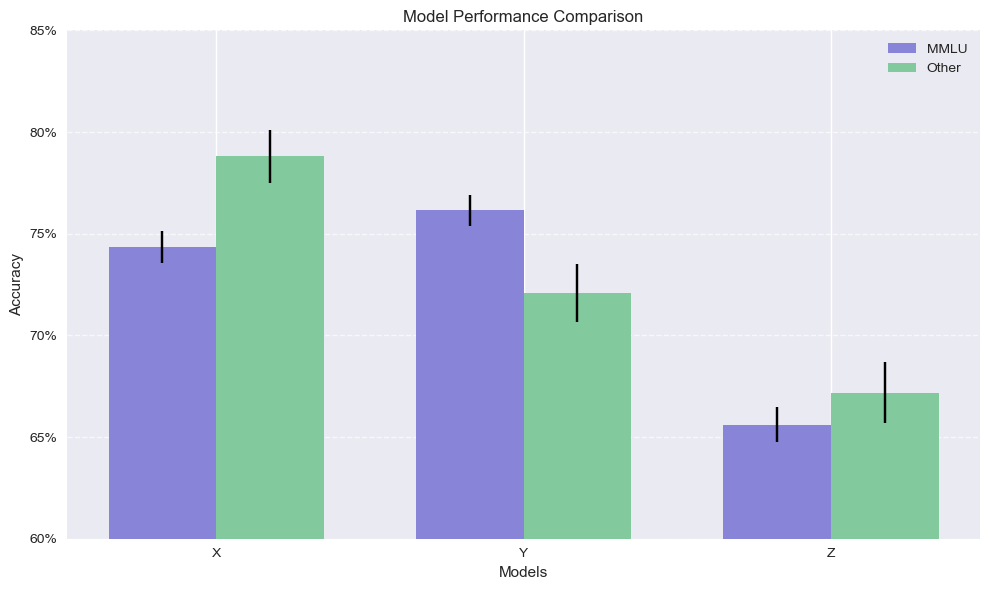

In [67]:
# Set figure size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')

# Set up positions for bars
models = ['X', 'Y', 'Z']
x = np.arange(len(models))
width = 0.35  # Width of the bars

# Calculate 95% confidence intervals (1.96 * standard error)
mmlu_ci = df_stats[df_stats['dataset'] == 'MMLU']['sem'] * 1.96
other_ci = df_stats[df_stats['dataset'] == 'Other']['sem'] * 1.96

# Create bars
plt.bar(x - width/2, 
        df_stats[df_stats['dataset'] == 'MMLU']['mean'],
        width,
        label='MMLU',
        color='#8884d8',
        yerr=mmlu_ci,
        capsize=5)

plt.bar(x + width/2,
        df_stats[df_stats['dataset'] == 'Other']['mean'],
        width,
        label='Other',
        color='#82ca9d',
        yerr=other_ci,
        capsize=5)

# Customize the plot
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.xlabel('Models')

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Set y-axis limits to focus on relevant range
plt.ylim(0.6, 0.85)

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

In [62]:
#C ????

### 2.2 (5 pt)

Geronimo has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

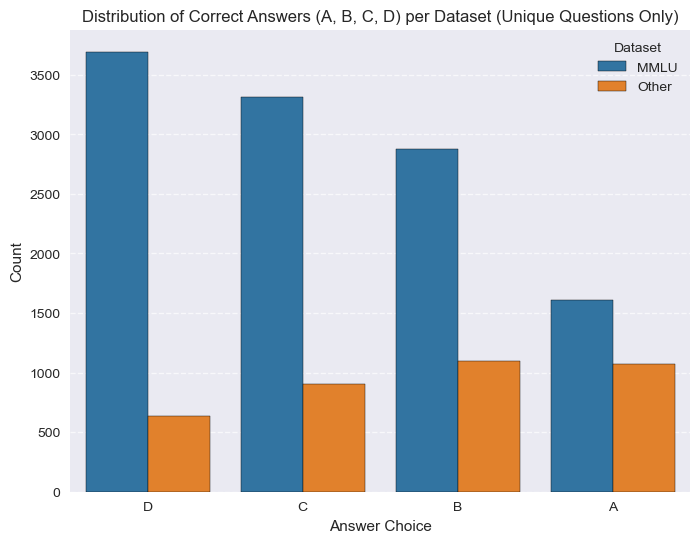

In [103]:
# Filter for correct answers and keep the first instance of each question_id
mmlu_correct = df_mmlu[df_mmlu['correct'] == True].drop_duplicates('question_id')
other_correct = df_other[df_other['correct'] == True].drop_duplicates('question_id')

# Count the distribution of correct answers
mmlu_counts = mmlu_correct['answer'].value_counts().rename_axis('answer').reset_index(name='count')
mmlu_counts['dataset'] = 'MMLU'

other_counts = other_correct['answer'].value_counts().rename_axis('answer').reset_index(name='count')
other_counts['dataset'] = 'Other'

# Combine both datasets for easier plotting
combined_counts = pd.concat([mmlu_counts, other_counts])

# Plot setup
plt.figure(figsize=(8, 6))
sns.barplot(data=combined_counts, x='answer', y='count', hue='dataset', palette='tab10', edgecolor='black')

# Titles and labels
plt.title('Distribution of Correct Answers (A, B, C, D) per Dataset (Unique Questions Only)')
plt.ylabel('Count')
plt.xlabel('Answer Choice')
plt.legend(title='Dataset', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [110]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(
    combined_counts['dataset'], combined_counts['answer'], values=combined_counts['count'], aggfunc='sum'
).fillna(0).to_numpy()

# Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output results
alpha = 0.05
print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the distribution of correct answers between datasets.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the distribution of correct answers between datasets.")


Chi-square Statistic: 623.1753
P-value: 0.0000
Degrees of Freedom: 3
Expected Frequencies: 
[[2027.25518331 3000.82143092 3182.98716514 3272.93622063]
 [ 654.74481669  969.17856908 1028.01283486 1057.06377937]]
Reject the null hypothesis: There is a significant difference in the distribution of correct answers between datasets.


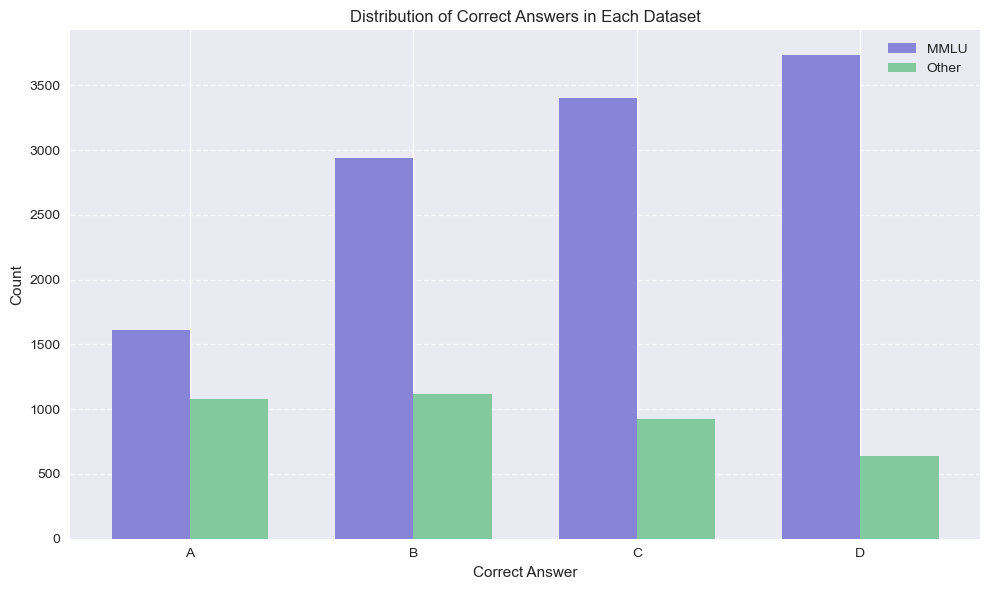


MMLU Answer Distribution:
D    3739
C    3403
B    2943
A    1611
Name: answer, dtype: int64

Other Answer Distribution:
B    1116
A    1078
C     924
D     641
Name: answer, dtype: int64


In [68]:
# Get unique questions and their correct answers for each dataset
mmlu_answers = df_mmlu.drop_duplicates('question_id')['answer'].value_counts()
other_answers = df_other.drop_duplicates('question_id')['answer'].value_counts()

# Create the plot
plt.figure(figsize=(10, 6))

# Set bar positions
labels = ['A', 'B', 'C', 'D']
x = np.arange(len(labels))
width = 0.35

# Create bars
plt.bar(x - width/2, [mmlu_answers.get(label, 0) for label in labels], 
        width, label='MMLU', color='#8884d8')
plt.bar(x + width/2, [other_answers.get(label, 0) for label in labels], 
        width, label='Other', color='#82ca9d')

# Customize plot
plt.ylabel('Count')
plt.xlabel('Correct Answer')
plt.title('Distribution of Correct Answers in Each Dataset')
plt.xticks(x, labels)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the distributions
print("\nMMLU Answer Distribution:")
print(mmlu_answers)
print("\nOther Answer Distribution:")
print(other_answers)

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [121]:
#A Compute the mean accuracy where the answer is correct.
def compute_conditional_accuracy(df, model_name):
    # Filter for the specific model
    df_filtered = df[df['model_name'] == model_name]
    # Group by answer choice and compute the conditional mean accuracy
    conditioned_accuracy = df_filtered.groupby('answer')['correct'].mean()
    
    return conditioned_accuracy

# Compute for both datasets
x_mmlu_accuracy = compute_conditional_accuracy(df_mmlu, 'X')
x_other_accuracy = compute_conditional_accuracy(df_other, 'X')


# Print results
print("Model X Mean Accuracy Conditioned on Answer Options:")
print("\nMMLU Dataset:")
print(x_mmlu_accuracy.round(4))

print("\nOther Dataset:")
print(x_other_accuracy.round(4))


0.6335918694838192
Model X Mean Accuracy Conditioned on Answer Options:

MMLU Dataset:
answer
A    0.9727
B    0.7992
C    0.7079
D    0.6336
Name: correct, dtype: float64

Other Dataset:
answer
A    0.9740
B    0.8065
C    0.6764
D    0.6037
Name: correct, dtype: float64


In [130]:
#B
# Null Hypothesis (H₀): The mean accuracy for answer "A" in the MMLU and Other datasets is the same.
# Alternative Hypothesis (H₁): The mean accuracy for answer "A" differs between the datasets.
from scipy.stats import ttest_ind

# Filter for LM X and answer "A" in both datasets
x_mmlu_a = df_mmlu[(df_mmlu['model_name'] == 'X') & (df_mmlu['answer'] == 'A')]['correct']
x_other_a = df_other[(df_other['model_name'] == 'X') & (df_other['answer'] == 'A')]['correct']

# Ensure both datasets have valid non-empty arrays
print(f"MMLU Answer 'A' correct values count: {len(x_mmlu_a)}")
print(f"Other Answer 'A' correct values count: {len(x_other_a)}")

# Perform the T-test
t_stat, p_value = ttest_ind(x_mmlu_a, x_other_a, equal_var=False)

# Confidence Interval
alpha = 0.05
print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in LM X's performance on answer 'A' between datasets.")
else:
    print("Fail to reject the null hypothesis: No significant difference in LM X's performance on answer 'A' between datasets.")


MMLU Answer 'A' correct values count: 1611
Other Answer 'A' correct values count: 1078

T-statistic: -0.2116
P-value: 0.8324
Fail to reject the null hypothesis: No significant difference in LM X's performance on answer 'A' between datasets.


In [129]:
#C
# Null Hypothesis (H₀): The mean accuracy for answer "A" in the MMLU and Other datasets is the same.
# Alternative Hypothesis (H₁): The mean accuracy for answer "A" differs between the datasets.

# Filter raw correct values for LM X and answer categories
mmlu_a = df_mmlu[(df_mmlu['model_name'] == 'X') & (df_mmlu['answer'] == 'A')]['correct']
mmlu_cd = df_mmlu[(df_mmlu['model_name'] == 'X') & (df_mmlu['answer'].isin(['C', 'D']))]['correct']

other_a = df_other[(df_other['model_name'] == 'X') & (df_other['answer'] == 'A')]['correct']
other_cd = df_other[(df_other['model_name'] == 'X') & (df_other['answer'].isin(['C', 'D']))]['correct']

# Helper function to perform the t-test
def perform_t_test(label, data_a, data_cd):
    t_stat, p_value = ttest_ind(data_a, data_cd, equal_var=False)
    print(f"\nDataset: {label}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Reject the null hypothesis: Significant difference between LM X's performance on 'A' vs. 'C or D'.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between LM X's performance on 'A' vs. 'C or D'.")

# Perform T-tests for both datasets
perform_t_test("MMLU", mmlu_a, mmlu_cd)
perform_t_test("Other", other_a, other_cd)



Dataset: MMLU
T-statistic: 44.0588
P-value: 0.0000
Reject the null hypothesis: Significant difference between LM X's performance on 'A' vs. 'C or D'.

Dataset: Other
T-statistic: 25.1395
P-value: 0.0000
Reject the null hypothesis: Significant difference between LM X's performance on 'A' vs. 'C or D'.


### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [131]:
#A
# Helper function to compute and display mean accuracies
def compute_mean_accuracies(df, dataset_name):
    grouped = df.groupby(['model_name', 'answer'])['correct'].mean().unstack()
    print(f"\nMean Accuracies Conditioned on Correct Answer for {dataset_name} Dataset:")
    print(grouped.round(4))
    return grouped

# Compute mean accuracies for both datasets
mmlu_means = compute_mean_accuracies(df_mmlu, "MMLU")
other_means = compute_mean_accuracies(df_other, "Other")



Mean Accuracies Conditioned on Correct Answer for MMLU Dataset:
answer           A       B       C       D
model_name                                
X           0.9727  0.7992  0.7079  0.6336
Y           0.6238  0.6881  0.7335  0.9043
Z           0.6431  0.6412  0.6691  0.6611

Mean Accuracies Conditioned on Correct Answer for Other Dataset:
answer           A       B       C       D
model_name                                
X           0.9740  0.8065  0.6764  0.6037
Y           0.6252  0.6640  0.7630  0.9204
Z           0.6809  0.6676  0.6623  0.6771


B. /Discuss:/
Within the same dataset, the distribution of correct answers for each option (A, B, C, D) is not evenly balanced. This implies that certain answer choices have a higher likelihood of being correct. Such an imbalance introduces an inherent bias that could unfairly favor models adept at predicting these frequent correct answers.
This is particularly problematic for evaluating language models because their performance might not be solely reflective of their ability to generalize but rather influenced by this uneven distribution.

The consistency across datasets supports the validity of comparing model performances between MMLU and Other datasets since the answer distribution bias seems similar.


### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Geronimo. After thinking it over, Geronimo concludes that more tests are needed. He orders a second round of MMLU results. However, Geronimo thinks of the following twist: while keeping questions fixed, he randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Geronimo do this?

B. /Discuss:/
Geronimo shuffled the correct answer positions to test for positional biases in the models. By doing this, he ensures the models are selecting answers based on content rather than position. This also eliminates any uneven distribution of correct answers in the original dataset. If the models perform worse after shuffling, it suggests they were relying too much on the answer position, providing a more accurate measure of their true performance.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

       question_id model_name  correct_original  correct_shuffled
0                0          X              True              True
1                1          X              True              True
2                2          X              True              True
3                3          X              True              True
4                7          X              True              True
...            ...        ...               ...               ...
35083        14037          Z              True              True
35084        14038          Z              True              True
35085        14039          Z              True              True
35086        14040          Z              True              True
35087        14041          Z              True             False

[35088 rows x 4 columns]


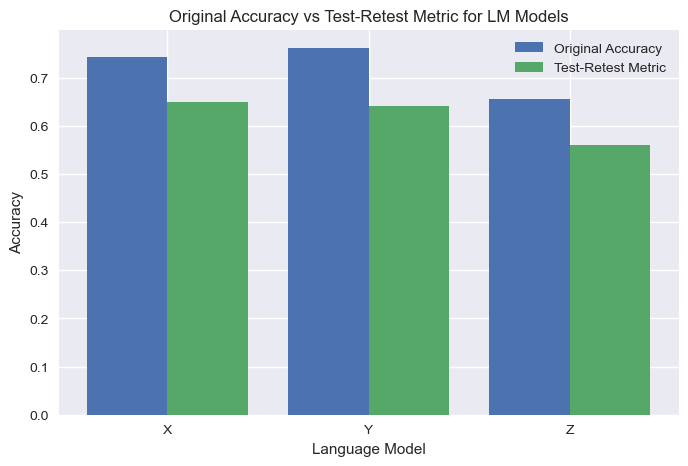

In [132]:
#fancy code
import matplotlib.pyplot as plt

# Load the datasets
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_mmlu_shuffle = pd.read_csv('data/task_2_5/lm_scores_mmlu_shuffle.csv')

# Ensure datasets are aligned by question_id and model_name
merged_df = pd.merge(
    df_mmlu[['question_id', 'model_name', 'correct']],
    df_mmlu_shuffle[['question_id', 'model_name', 'correct']],
    on=['question_id', 'model_name'],
    suffixes=('_original', '_shuffled')
)

print(merged_df)

# Compute the test-retest metric for each model
test_retest_scores = merged_df.groupby('model_name').apply(
    lambda group: np.mean(group['correct_original'] == group['correct_shuffled'])
)

# Compute original accuracy for comparison
original_accuracy = df_mmlu.groupby('model_name')['correct'].mean()

# Combine original and test-retest scores into a DataFrame
results_df = pd.DataFrame({
    'Original Accuracy': original_accuracy,
    'Test-Retest Metric': test_retest_scores
}).reset_index()

# Plot the results
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.4
index = np.arange(len(results_df))

# Bar plot for original accuracy and test-retest metric
plt.bar(index - bar_width / 2, results_df['Original Accuracy'], bar_width, label='Original Accuracy')
plt.bar(index + bar_width / 2, results_df['Test-Retest Metric'], bar_width, label='Test-Retest Metric')

# Annotate plot
plt.xlabel('Language Model')
plt.ylabel('Accuracy')
plt.title('Original Accuracy vs Test-Retest Metric for LM Models')
plt.xticks(index, results_df['model_name'])
plt.legend()

plt.show()

The variation between the original and test-retest accuracies highlights a potential weakness in the models' robustness when the order of answers changes.

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [133]:
#A
# Group by model_name and result to compute the distribution of answers and accuracy
answer_distribution = df_mmlu.groupby(['model_name', 'result']).size().unstack().fillna(0)

# Accuracy conditioned on answer given
accuracy_conditioned = (
    df_mmlu.groupby(['model_name', 'result'])['correct'].mean().unstack().fillna(0)
)

print("Answer Distribution for each LM:")
print(answer_distribution)

print("\nAccuracy Conditioned on the Answer Given for each LM:")
print(accuracy_conditioned)


Answer Distribution for each LM:
result         A     B     C     D
model_name                        
X           4259  2659  2409  2369
Y           1072  2256  3015  5353
Z           2176  2885  3237  3398

Accuracy Conditioned on the Answer Given for each LM:
result             A         B         C         D
model_name                                        
X           0.367927  0.884543  1.000000  1.000000
Y           0.937500  0.897606  0.827861  0.631608
Z           0.476103  0.654073  0.703429  0.727487


B. /Discuss:/
The clear inconsistencies in answer distribution and accuracy across models highlight potential biases. Model X's perfect accuracy on "C" and "D" is suspicious and may indicate some deterministic behavior rather than genuine reasoning. Model Y's bias toward "D" combined with lower accuracy for that choice further suggests poor calibration. Model Z is relatively more stable but still shows uneven performance.


## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage based in Maastricht named Yodata:

```
"Hmmm, correct you are, jonge padawan, to question how the wereld is seen by large language models! Simple 'text,' it is not, nee nee nee! Characters and words, the way of gewone humans, this is not, heh heh heh.

'Tokens,' they use, ja! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z.' Chunky blocks of text, they become, yes! 'Hello world,' a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, hmm? Verwarrend, it is!

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.

Meditate on this, you should. The force of natural language processing, strong it is. But geduld, you must have, my jonge padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Ja, hmmm!"
```

Admittingly, Yodata at times speaks in riddles... However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [14]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

KeyboardInterrupt: 

### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [15]:
#A

In [ ]:
#B

In [ ]:
#C

### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each question-answer pair, compute: 
1. the number of "A", "B", "C", and "D" tokens that occur in the combined question and answers; 
2. an the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [17]:
#A

,A,B,C,D,total
,mean,mean,mean,mean,mean
answer,,,,,
A,0.243017,0.018932,0.025140,0.013035,93.187151
B,0.231947,0.019642,0.029463,0.012709,88.846332
C,0.226410,0.018984,0.034897,0.015355,92.653825
D,0.242850,0.014566,0.030985,0.014301,92.110169


B. /Discuss:/

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [16]:
#A

B. /Discuss:/

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

B. /Discuss:/

1.

2.

3.

4.